# MMSE estimator (Bayesian estimation)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['font.size'] = '10'

## Gaussian prior
Consider the linear model $x[n]=A+w[n]$ with $w[n]\sim \mathcal{N}(0,\sigma^2)$ and prior $A \sim \mathcal{N}(\mu_A,\sigma_A^2)$.

In [161]:
# Linear model
N = 10
A = 5
sigma = 2
wn = sigma*np.random.randn(N)
xn = A + wn

# Prior
mu_A = 0
sigma_A = 10

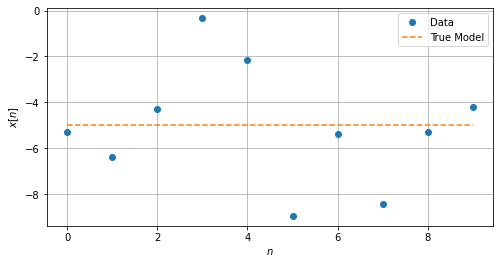

In [162]:
# Plotting data
plt.figure(figsize=[8,4])
plt.plot(xn,'o')
plt.plot([0,N-1],[A,A],'--')
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['Data','True Model']);

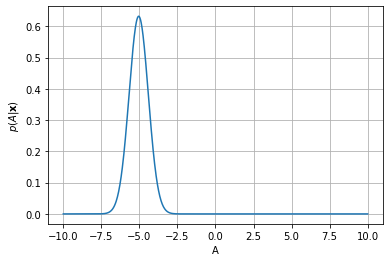

In [163]:
# A posteriori PDF
NA = 1001
Am = np.linspace(-10,10,num=NA)
dA = (Am[NA-1]-Am[0])/(NA-1)
pxA = np.zeros(NA)
for m in range(NA):
    pxA[m] = np.exp(-np.sum((xn-Am[m])**2)/(2*sigma**2))
pA = np.exp(-(Am-mu_A)**2/(2*sigma_A**2))
pAx = pxA*pA / (np.sum(pxA*pA)*dA)

# Plotting A posteriori PDF

plt.figure()
plt.plot(Am,pAx)
plt.xlabel('A')
plt.ylabel('$p(A|\mathbf{x})$')
plt.grid('on')

In [164]:
# Calculating the MMSE estimator
A_mmse = np.sum(Am*pAx)*dA
b_mmse = np.sum((Am-A_mmse)**2*pAx)*dA

print('Numerically computed parameters')
print('Estimated parameter:',A_mmse)
print('Bayesian MSE:',b_mmse)

# Applying formula
s2_Ax = 1/(N/sigma**2+1/sigma_A**2)
mu_Ax = (N/sigma**2*np.mean(xn)+mu_A/sigma_A**2)*s2_Ax

print('Analytical parameters')
print('Estimated parameter:',mu_Ax)
print('Bayesian MSE:',s2_Ax)


Numerically computed parameters
Estimated parameter: -5.045194232158834
Bayesian MSE: 0.39840637450194627
Analytical parameters
Estimated parameter: -5.0451942321588445
Bayesian MSE: 0.39840637450199207
